In [1]:
#load relevant packages
import pandas as pd
import numpy as np
import sqlite3

In [2]:
#establish connection to SQL database
conn = sqlite3.connect('database.sqlite')
c = conn.cursor()

In [3]:
#get general match information from Match table
c.execute('''SELECT 
                   id,
                   country_id,
                   league_id,
                   season,
                   date,
                   match_api_id,
                   home_team_api_id,
                   away_team_api_id,
                   home_team_goal,
                   away_team_goal
                                   FROM Match''')

match = pd.DataFrame(c.fetchall())
match.columns = [i[0] for i in c.description]

In [4]:
match.head()

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3


In [5]:
#view summary stats for goals scored by hometeam
match.groupby('league_id').describe()['home_team_goal']

,count,mean,std,min,25%,50%,75%,max
league_id,,,,,,,,
1,1728.0,1.609375,1.293458,0.0,1.0,1.0,2.0,7.0
1729,3040.0,1.550987,1.311615,0.0,1.0,1.0,2.0,9.0
4769,3040.0,1.402961,1.170743,0.0,1.0,1.0,2.0,6.0
7809,2448.0,1.626634,1.339529,0.0,1.0,1.0,2.0,9.0
10257,3017.0,1.500829,1.221797,0.0,1.0,1.0,2.0,7.0
13274,2448.0,1.779820,1.405274,0.0,1.0,2.0,3.0,10.0
15722,1920.0,1.394792,1.183249,0.0,0.0,1.0,2.0,6.0
17642,2052.0,1.408382,1.226192,0.0,0.0,1.0,2.0,8.0
19694,1824.0,1.429276,1.294928,0.0,0.0,1.0,2.0,9.0


In [6]:
#view team table
c.execute('''SELECT * FROM Team ''')

team_df = pd.DataFrame(c.fetchall())
team_df.columns = [i[0] for i in c.description]
team_df.head(10)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
5,6,8635,229.0,RSC Anderlecht,AND
6,7,9991,674.0,KAA Gent,GEN
7,8,9998,1747.0,RAEC Mons,MON
8,9,7947,NaN,FCV Dender EH,DEN
9,10,9985,232.0,Standard de Liège,STL


In [7]:
#check for duplicate team names
team_df['team_long_name'].value_counts()

Polonia Bytom           2
Widzew Łódź             2
Royal Excel Mouscron    2
Bologna                 1
FC Volendam             1
                       ..
Wisła Kraków            1
St. Mirren              1
VVV-Venlo               1
Paris Saint-Germain     1
FC Penafiel             1
Name: team_long_name, Length: 296, dtype: int64

In [9]:
#check duplicate team names and other information
team_df.loc[team_df['team_long_name']=='Royal Excel Mouscron']

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
15,16,9996,111560.0,Royal Excel Mouscron,MOU
24,2510,274581,111560.0,Royal Excel Mouscron,MOP


In [10]:
#view team attributes table
c.execute('''SELECT * FROM Team_Attributes ''')

team_attr = pd.DataFrame(c.fetchall())
team_attr.columns = [i[0] for i in c.description]
team_attr.head().transpose()

,0,1,2,3,4
id,1,2,3,4,5
team_fifa_api_id,434,434,434,77,77
team_api_id,9930,9930,9930,8485,8485
date,2010-02-22 00:00:00,2014-09-19 00:00:00,2015-09-10 00:00:00,2010-02-22 00:00:00,2011-02-22 00:00:00
buildUpPlaySpeed,60,52,47,70,47
buildUpPlaySpeedClass,Balanced,Balanced,Balanced,Fast,Balanced
buildUpPlayDribbling,NaN,48,41,NaN,NaN
buildUpPlayDribblingClass,Little,Normal,Normal,Little,Little
buildUpPlayPassing,50,56,54,70,52
buildUpPlayPassingClass,Mixed,Mixed,Mixed,Long,Mixed


In [11]:
#view player attributes table
c.execute('''SELECT * FROM Player_Attributes ''')

player_attr = pd.DataFrame(c.fetchall())
player_attr.columns = [i[0] for i in c.description]
player_attr.head().transpose()

,0,1,2,3,4
id,1,2,3,4,5
player_fifa_api_id,218353,218353,218353,218353,218353
player_api_id,505942,505942,505942,505942,505942
date,2016-02-18 00:00:00,2015-11-19 00:00:00,2015-09-21 00:00:00,2015-03-20 00:00:00,2007-02-22 00:00:00
overall_rating,67,67,62,61,61
potential,71,71,66,65,65
preferred_foot,right,right,right,right,right
attacking_work_rate,medium,medium,medium,medium,medium
defensive_work_rate,medium,medium,medium,medium,medium
crossing,49,49,49,48,48


In [12]:
#check all information related to one player
player_attr.loc[player_attr['player_api_id']==40714]

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
147638,147639,168965,40714,2016-04-28 00:00:00,77.0,77.0,right,medium,medium,14.0,...,39.0,23.0,14.0,13.0,12.0,76.0,77.0,81.0,77.0,79.0
147639,147640,168965,40714,2015-11-12 00:00:00,79.0,79.0,right,medium,medium,14.0,...,39.0,23.0,14.0,13.0,12.0,78.0,81.0,81.0,80.0,80.0
147640,147641,168965,40714,2015-09-21 00:00:00,79.0,79.0,right,medium,medium,14.0,...,11.0,23.0,14.0,13.0,12.0,78.0,81.0,81.0,80.0,80.0
147641,147642,168965,40714,2015-08-21 00:00:00,78.0,81.0,right,medium,medium,25.0,...,25.0,22.0,25.0,25.0,25.0,77.0,80.0,80.0,79.0,79.0
147642,147643,168965,40714,2015-04-10 00:00:00,78.0,81.0,right,medium,medium,25.0,...,25.0,22.0,25.0,25.0,25.0,77.0,80.0,80.0,79.0,79.0
147643,147644,168965,40714,2015-01-16 00:00:00,78.0,81.0,right,medium,medium,25.0,...,25.0,22.0,25.0,25.0,25.0,77.0,80.0,80.0,79.0,79.0
147644,147645,168965,40714,2015-01-09 00:00:00,77.0,80.0,right,medium,medium,25.0,...,25.0,22.0,25.0,25.0,25.0,75.0,79.0,79.0,78.0,78.0
147645,147646,168965,40714,2014-11-14 00:00:00,75.0,78.0,right,medium,medium,25.0,...,25.0,22.0,25.0,25.0,25.0,75.0,76.0,77.0,78.0,74.0
147646,147647,168965,40714,2014-10-17 00:00:00,74.0,76.0,right,medium,medium,25.0,...,25.0,22.0,25.0,25.0,25.0,74.0,76.0,76.0,78.0,71.0
147647,147648,168965,40714,2014-09-18 00:00:00,74.0,76.0,right,medium,medium,25.0,...,25.0,22.0,25.0,25.0,25.0,74.0,76.0,76.0,78.0,71.0


#### Guiding Questions
- Is there a statistical difference in the odds of winning a game when a team is playing on their home field?
- Is there a statistical difference in the odds of losing a game when a team is playing?
- Is there a statistical difference in the odds of drawing when a team is playing at home/away?

- Is there a statistical difference in the number of goals scored when a team is playing on their home field?(pct)

- Is there a statistical difference in the number of goals scored between different leagues in a given season(same number of teams for league comparisons)
- Is bootstrapping applicable to certain samples??

In [13]:
#view league info table
c.execute('''SELECT * FROM League ''')

league_df = pd.DataFrame(c.fetchall())
league_df.columns = [i[0] for i in c.description]

In [14]:
league_df

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [15]:
#join league and match tables
c.execute('''SELECT 
                   m.id,
                   l.name as league,
                   m.season,
                   m.date,
                   m.match_api_id,
                   m.home_team_api_id,
                   m.away_team_api_id,
                   m.home_team_goal,
                   m.away_team_goal
                                   FROM Match m
                                   LEFT JOIN League l ON m.league_id = l.id
                                   
            ;''')

match_league = pd.DataFrame(c.fetchall())
match_league.columns = [i[0] for i in c.description]

In [16]:
match_league.head()

,id,league,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,Belgium Jupiler League,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,Belgium Jupiler League,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3


In [17]:
match_league['total_goals'] = match_league['home_team_goal'] + match_league['away_team_goal']

In [18]:
match_league.groupby(['league']).describe()['total_goals']

,count,mean,std,min,25%,50%,75%,max
league,,,,,,,,
Belgium Jupiler League,1728.0,2.801505,1.656507,0.0,2.00,3.0,4.0,9.0
England Premier League,3040.0,2.710526,1.691127,0.0,1.00,3.0,4.0,10.0
France Ligue 1,3040.0,2.443092,1.551799,0.0,1.00,2.0,3.0,10.0
Germany 1. Bundesliga,2448.0,2.901552,1.704974,0.0,2.00,3.0,4.0,11.0
Italy Serie A,3017.0,2.616838,1.640327,0.0,1.00,2.0,4.0,9.0
Netherlands Eredivisie,2448.0,3.080882,1.740640,0.0,2.00,3.0,4.0,10.0
Poland Ekstraklasa,1920.0,2.425000,1.540355,0.0,1.00,2.0,3.0,8.0
Portugal Liga ZON Sagres,2052.0,2.534600,1.637348,0.0,1.00,2.0,4.0,9.0
Scotland Premier League,1824.0,2.633772,1.644379,0.0,1.00,2.0,4.0,12.0


In [63]:
#summary stats for total goals by league per season
match_league.groupby(['league', 'season']).describe()['total_goals']

count      mean       std  min   25%  50%  \
league                   season                                                 
Belgium Jupiler League   2008/2009  306.0  2.794118  1.599210  0.0  2.00  3.0   
                         2009/2010  210.0  2.690476  1.468784  0.0  2.00  2.0   
                         2010/2011  240.0  2.645833  1.657866  0.0  1.00  2.0   
                         2011/2012  240.0  2.879167  1.803641  0.0  2.00  3.0   
                         2012/2013  240.0  2.929167  1.733012  0.0  2.00  3.0   
                         2013/2014   12.0  2.500000  1.930615  0.0  1.00  2.0   
                         2014/2015  240.0  2.783333  1.704944  0.0  2.00  3.0   
                         2015/2016  240.0  2.891667  1.588641  0.0  2.00  3.0   
England Premier League   2008/2009  380.0  2.478947  1.607068  0.0  1.00  2.0   
                         2009/2010  380.0  2.771053  1.768294  0.0  2.00  3.0   
                         2010/2011  380.0  2.797368  1.620610  0.0  2.00  3.0   
                         2011/2012  380.0  2.805263  1.687756  0.0  2.00  3.0   
                         2012/2013  380.0  2.797368  1.773000  0.0  1.00  3.0   
                         2013/2014  380.0  2.768421  1.732524  0.0  1.00  3.0   
                         2014/2015  380.0  2.565789  1.630316  0.0  1.00  2.0   
                         2015/2016  380.0  2.700000  1.684792  0.0  1.00  3.0   
France Ligue 1           2008/2009  380.0  2.257895  1.422331  0.0  1.00  2.0   
                         2009/2010  380.0  2.410526  1.564748  0.0  1.00  2.0   
                         2010/2011  380.0  2.342105  1.474073  0.0  1.00  2.0   
                         2011/2012  380.0  2.515789  1.565547  0.0  1.00  2.0   
                         2012/2013  380.0  2.544737  1.603294  0.0  1.00  2.0   
                         2013/2014  380.0  2.455263  1.483631  0.0  1.00  2.0   
                         2014/2015  380.0  2.492105  1.642908  0.0  1.00  2.0   
                         2015/2016  380.0  2.526316  1.634665  0.0  1.00  2.0   
Germany 1. Bundesliga    2008/2009  306.0  2.921569  1.641788  0.0  2.00  3.0   
                         2009/2010  306.0  2.830065  1.749158  0.0  2.00  3.0   
                         2010/2011  306.0  2.921569  1.685150  0.0  2.00  3.0   
                         2011/2012  306.0  2.859477  1.678170  0.0  2.00  3.0   
                         2012/2013  306.0  2.934641  1.727969  0.0  2.00  3.0   
                         2013/2014  306.0  3.160131  1.713164  0.0  2.00  3.0   
...                                   ...       ...       ...  ...   ...  ...   
Portugal Liga ZON Sagres 2010/2011  240.0  2.433333  1.640152  0.0  1.00  2.0   
                         2011/2012  240.0  2.641667  1.688236  0.0  1.00  3.0   
                         2012/2013  240.0  2.779167  1.632945  0.0  2.00  3.0   
                         2013/2014  240.0  2.370833  1.457911  0.0  1.00  2.0   
                         2014/2015  306.0  2.493464  1.539094  0.0  1.00  2.0   
                         2015/2016  306.0  2.715686  1.712313  0.0  1.00  3.0   
Scotland Premier League  2008/2009  228.0  2.403509  1.506048  0.0  1.00  2.0   
                         2009/2010  228.0  2.565789  1.805539  0.0  1.00  2.0   
                         2010/2011  228.0  2.561404  1.469425  0.0  2.00  2.0   
                         2011/2012  228.0  2.635965  1.772011  0.0  1.00  2.0   
                         2012/2013  228.0  2.732456  1.751877  0.0  1.00  3.0   
                         2013/2014  228.0  2.745614  1.630175  0.0  2.00  3.0   
                         2014/2015  228.0  2.574561  1.456767  0.0  1.00  2.5   
                         2015/2016  228.0  2.850877  1.703753  0.0  2.00  3.0   
Spain LIGA BBVA          2008/2009  380.0  2.897368  1.781610  0.0  2.00  3.0   
                         2009/2010  380.0  2.713158  1.640302  0.0  2.00  3.0   
                         2010/2011  380.0  2.742105  1.691767  0.0 

In [19]:
ligue_1 = match_league.loc[match_league['league']=='France Ligue 1']

In [20]:
scot = match_league.loc[match_league['league']=='Scotland Premier League']

In [21]:
ered = match_league.loc[match_league['league']=='Netherlands Eredivisie']

In [22]:
import matplotlib.pyplot
%matplotlib inline

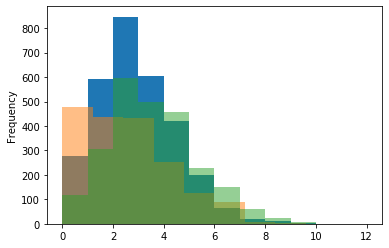

In [24]:
#superimpose histogram of goals scored per match for French Ligue 1, Scottish PL and Dutch League
ligue_1['total_goals'].plot(kind='hist');
scot['total_goals'].plot(kind='hist', alpha=0.5);
ered['total_goals'].plot(kind='hist', alpha=0.5);

In [25]:
#isolate goals for each league
ligue_1_goals = ligue_1['total_goals']
scot_goals = scot['total_goals']
ered_goals = ered['total_goals']

In [27]:
import math
from scipy import stats

In [28]:
#t-test function
def welch_t(a, b):
    
    """ Calculate Welch's t statistic for two samples. """
    n_a = len(a)
    n_b = len(b)
    mu_a = a.mean()
    mu_b = b.mean()
    var_a = a.var(ddof=1)
    var_b = b.var(ddof=1)
    se_a = var_a/n_a
    se_b = var_b/n_b

    t = (mu_b-mu_a)/math.sqrt(se_a + se_b)
    return abs(t)

In [29]:
#degrees of freedom function
def welch_df(a, b):
    
    """ Calculate the effective degrees of freedom for two samples. """
    n_a = len(a)
    n_b = len(b)
    mu_a = a.mean()
    mu_b = b.mean()
    var_a = a.var(ddof=1)
    var_b = b.var(ddof=1)
    se_a = var_a/n_a
    se_b = var_b/n_b
    v_a = n_a-1
    v_b = n_b-1
    vf_a = (var_a**2)/((n_a**2)*v_a)
    vf_b = (var_b**2)/((n_b**2)*v_b)
    
    v = (se_a+se_b)**2/(vf_a + vf_b)
    
    return v


In [30]:
#p-value function
def p_value(a, b, two_sided=False):
    #Your code here
    t = welch_t(a, b)
    df = welch_df(a, b)
    p = 1-stats.t.cdf(t, df, 0, 1)
    
    return p+p*two_sided

In [31]:
welch_t(ligue_1_goals, scot_goals)

3.998106232020523

In [32]:
welch_df(ligue_1_goals, scot_goals)

3664.1365331879647

In [33]:
p_value(ligue_1_goals, scot_goals)

3.2554781857485615e-05

In [34]:
p_value(ligue_1_goals, ered_goals)

0.0

In [35]:
ered_goals.mean()

3.0808823529411766

In [36]:
p_value(scot_goals, ered_goals)

0.0

In [37]:
#view all information from match table
c.execute('''SELECT * FROM Match''')

match_all = pd.DataFrame(c.fetchall())
match_all.columns = [i[0] for i in c.description]

In [38]:
match_all.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [39]:
ligue_1_all = match_all.loc[match_all['league_id']==4769]

In [40]:
ligue_1_all.iloc[:, range(50, 80) ].head().transpose()

,4768,4769,4770,4771,4772
away_player_Y7,7,7,7,7,7
away_player_Y8,7,7,7,7,7
away_player_Y9,7,7,7,7,10
away_player_Y10,10,10,7,10,10
away_player_Y11,10,10,11,10,10
home_player_1,40714,30458,41186,NaN,26295
home_player_2,11323,32571,71607,40680,26162
home_player_3,30823,38703,38111,NaN,37553
home_player_4,26136,40543,46447,40681,34320
home_player_5,39996,26119,103470,40677,26155


In [41]:
#view player information
c.execute('''SELECT * FROM Player ''')

player = pd.DataFrame(c.fetchall())
player.columns = [i[0] for i in c.description]
player.head().transpose()

,0,1,2,3,4
id,1,2,3,4,5
player_api_id,505942,155782,162549,30572,23780
player_name,Aaron Appindangoye,Aaron Cresswell,Aaron Doran,Aaron Galindo,Aaron Hughes
player_fifa_api_id,218353,189615,186170,140161,17725
birthday,1992-02-29 00:00:00,1989-12-15 00:00:00,1991-05-13 00:00:00,1982-05-08 00:00:00,1979-11-08 00:00:00
height,182.88,170.18,170.18,182.88,182.88
weight,187,146,163,198,154


In [42]:
player.loc[player['player_api_id']==40714]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
8844,8858,40714,Remy Riou,168965,1987-08-06 00:00:00,187.96,179


In [ ]:
#Is there a statistical difference in the number of average goals scored per match between different leagues?
#Is there a statistical difference in the average players rating per match between different leagues?
#Is there a statistical difference in the number of scoreless matches between different leagues per season?